Lambda School Data Science

*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: Student should be able to discuss the importance of batch size
* <a href="#p3">Part 3</a>: Student should be able to discuss the importance of learning rate

## Summary of Yesterday

Yesterday, we learned about some of the principal components of Neural Networks: Neurons, Weights, Activation Functions, and layers (input, output, & hidden). Today, we will reinforce our understanding of those components and introduce the mechanics of training a neural network. Feed-forward neural networks, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of gradient descent where the gradient has been calculated by backpropagation.

  <center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: input, hidden, and output layers.
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Signal is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (think arrow/connecting line)
 - Adding a bias to this weighted some of inputs and weights
 - Activating this weighted sum + bias by squishifying it with sigmoid or some other activation function. With a single perceptron with three inputs, calculating the output from the node is done like so:
\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}
 - this final activated value is the signal that gets passed onto the next layer of the network.
 

## Training a Neural Network: *Formal Summary*

Lecture with Bruno Janota ~ 15:00

0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly initialize weights
2. Implement forward propagation to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a cost function $J(\theta)$
4. Implement backpropagation to compute partial derivatives $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use gradient descent (or other advanced optimizer) with backpropagation to minimize $J(\theta)$ as a function of parameters $\theta\$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

# Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

Lecture with Bruno Janota ~ 

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, [3Blue1Brown's video is a great starting place](https://www.youtube.com/watch?v=tIeHLnjs5U8). I also highly recommend this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

### What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

## Follow Along

In this section, we will again a simple neural network using base TensorFlow. We'll focus on using a __Feed Forward Neural Network__ to predict test scores. 

<center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_99C94113202D-1.jpeg"width=500></center>

### Generate some Fake Data

Lecture with Bruno Janota ~ 44:00

In [ ]:
import tensorflow as tf

# Imagine that our data is drawn from a linear function
# y = 3*hours_studying + 50

TRUE_W = 3.5
TRUE_b = 50.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_b + noise

### Loss Function
Here we will use Mean Squared Error (MSE), because this is a regression problem. We are trying to predict a continuous target.

In [ ]:
def loss(target_y, predicted_y):
  "MSE"
  return tf.reduce_mean(tf.square(target_y - predicted_y))

### Neural Network Architecture
Lets create a Neural Network class called "Model" to contain this functionality. Note: This is essentially a linear regression whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex function like the multi-layer networks we constructed yesterday.

In [ ]:
class Model(object):

  def __init__(self):
    self.W = tf.Variable(8.0)
    self.b = tf.Variable(40.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 64.0

### Initial Weights
The initial weights in our model were arbitrary. In practice, weights are initialized randomly. 

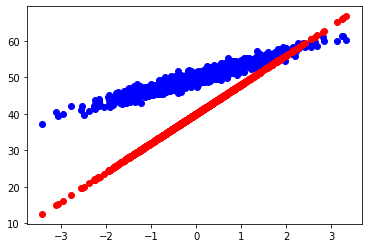

Current loss: 122.291069


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

### Update Weights Based on Gradient

> *Assigning blame for bad predictions and delivering justice - repeatedly and a little bit at a time*

You should also know that with neural networks it is common to have gradients that are not convex (like what we saw when we applied gradient descent to linear regression). 

Due to the high complexity of these models and their nonlinearity, it is common for gradient descent to get stuck in a local minimum, but there are ways to combat this:

1) Stochastic Gradient Descent

2) More advanced Gradient-Descent-based "Optimizers" - See Stretch Goals on assignment.

In [ ]:
 def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t: 
     current_loss = loss(outputs, model(inputs))

  # dw = derivitive of weight, db = derivitive of the bias
  dW, db = t.gradient(current_loss, [model.W, model.b])

  # Gets a percentage of the derivitive
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

### Train the Network

In [ ]:
model = Model()

# Store Some history of weights
Ws, bs = [], []
epochs = range(20)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=8.00 b=40.00 loss=122.29107
Epoch  1: W=7.06 b=42.00 loss=78.26422
Epoch  2: W=6.31 b=43.60 loss=50.21274
Epoch  3: W=5.71 b=44.88 loss=32.33903
Epoch  4: W=5.24 b=45.90 loss=20.94980
Epoch  5: W=4.87 b=46.72 loss=13.69216
Epoch  6: W=4.58 b=47.37 loss=9.06712
Epoch  7: W=4.34 b=47.90 loss=6.11961
Epoch  8: W=4.16 b=48.32 loss=4.24108
Epoch  9: W=4.01 b=48.65 loss=3.04379
Epoch 10: W=3.90 b=48.92 loss=2.28066
Epoch 11: W=3.80 b=49.13 loss=1.79423
Epoch 12: W=3.73 b=49.30 loss=1.48416
Epoch 13: W=3.67 b=49.44 loss=1.28650
Epoch 14: W=3.63 b=49.55 loss=1.16049
Epoch 15: W=3.59 b=49.63 loss=1.08016
Epoch 16: W=3.56 b=49.70 loss=1.02894
Epoch 17: W=3.54 b=49.76 loss=0.99628
Epoch 18: W=3.52 b=49.80 loss=0.97546
Epoch 19: W=3.51 b=49.84 loss=0.96219


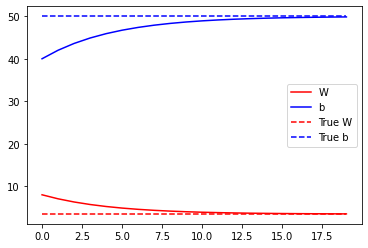

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

## Challenge

Lecture with Bruno Janota ~ 56:00

In the module project, you will be asked to explain the logic of backpropagation and gradient descent.

### In the following two sections we'll look at batch size and learning rate hyperparameters in isolation. 
However, it's important to know that recent research found some interesting relationships between batch sizes and learning rates. The best available suggestion today is to scale batch size proportionally to a learning rate:
- https://openreview.net/pdf?id=B1Yy1BxCZ
- https://papers.nips.cc/paper/8398-control-batch-size-and-learning-rate-to-generalize-well-theoretical-and-empirical-evidence.pdf

# Batch Size (Learn)

## Overview

The What - Stochastic Gradient Descent calculates an approximation of the gradient over the entire dataset by reviewing the predictions of a random sample. 

The Why - *Speed*. Calculating the gradient over the entire dataset is extremely expensive computationally. 

### Batch Size
Batches are the number of observations our model is shown to make predictions and update the weights. Batches are selected randomly during epoch. All observations are considered when passing thru an epoch at some point.

- Batch Gradient Descent:  
    Direct approach. Goes straight to the bottom but is very computationally expensive because it goes through all the layers at once.

- Mini-Batch Gradient Descent:  
    units - 

- Stochastic Gradient Descent:
    sgd - the most used because you specify the batch size that it looks at a time and updates the weight before moving on to the next batch.

### Baseline Model

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

In [ ]:
# Our Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# Create a function to train the model for each iteration
def create_model(learning_rate=0.01):
    opt = SGD(lr=learning_rate)
    model = Sequential([
                        Dense(64, input_dim=784, activation='relu'),
                        Dense(32, activation='relu'),
                        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=opt, 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

## Follow Along
Let's run a series of experiments for a default, small, and large batch size.

### Default
Batch Size is 32

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bt_default = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1151 - accuracy: 0.6822 - val_loss: 0.3341 - val_accuracy: 0.9046
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3253 - accuracy: 0.9068 - val_loss: 0.2661 - val_accuracy: 0.9218
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2614 - accuracy: 0.9237 - val_loss: 0.2294 - val_accuracy: 0.9359
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2251 - accuracy: 0.9355 - val_loss: 0.2027 - val_accuracy: 0.9396
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2036 - accuracy: 0.9415 - val_loss: 0.1844 - val_accuracy: 0.9466
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1843 - accuracy: 0.9458 - val_loss: 0.1660 - val_accuracy: 0.9530
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1606 - accuracy: 0.9547 - val_loss: 0.1571 - val_accuracy:

### Small Batch Size
Batch Size is 8

In [ ]:
model = create_model()
bt_small = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=8,
                       validation_data=(X_test, y_test))

Epoch 1/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.6644 - accuracy: 0.8084 - val_loss: 0.2232 - val_accuracy: 0.9378
Epoch 2/20
7500/7500 [==============================] - 10s 1ms/step - loss: 0.2145 - accuracy: 0.9379 - val_loss: 0.1606 - val_accuracy: 0.9526
Epoch 3/20
7500/7500 [==============================] - 10s 1ms/step - loss: 0.1584 - accuracy: 0.9548 - val_loss: 0.1398 - val_accuracy: 0.9565
Epoch 4/20
7500/7500 [==============================] - 10s 1ms/step - loss: 0.1281 - accuracy: 0.9632 - val_loss: 0.1245 - val_accuracy: 0.9617
Epoch 5/20
7500/7500 [==============================] - 10s 1ms/step - loss: 0.1056 - accuracy: 0.9690 - val_loss: 0.1225 - val_accuracy: 0.9626
Epoch 6/20
7500/7500 [==============================] - 10s 1ms/step - loss: 0.0879 - accuracy: 0.9742 - val_loss: 0.1060 - val_accuracy: 0.9680
Epoch 7/20
7500/7500 [==============================] - 10s 1ms/step - loss: 0.0774 - accuracy: 0.9772 - val_loss: 0.0992 - val_ac

### Large Batch Size
Batch Size is 512

In [ ]:
model = create_model()
bt_large = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(X_test, y_test))

Epoch 1/20
118/118 [==============================] - 1s 8ms/step - loss: 2.2646 - accuracy: 0.1740 - val_loss: 1.9751 - val_accuracy: 0.4324
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 1.8790 - accuracy: 0.4755 - val_loss: 1.5060 - val_accuracy: 0.6390
Epoch 3/20
118/118 [==============================] - 1s 6ms/step - loss: 1.4024 - accuracy: 0.6649 - val_loss: 1.0620 - val_accuracy: 0.7525
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 1.0079 - accuracy: 0.7573 - val_loss: 0.8067 - val_accuracy: 0.8043
Epoch 5/20
118/118 [==============================] - 1s 6ms/step - loss: 0.7852 - accuracy: 0.8043 - val_loss: 0.6637 - val_accuracy: 0.8353
Epoch 6/20
118/118 [==============================] - 1s 6ms/step - loss: 0.6616 - accuracy: 0.8270 - val_loss: 0.5760 - val_accuracy: 0.8510
Epoch 7/20
118/118 [==============================] - 1s 6ms/step - loss: 0.5722 - accuracy: 0.8496 - val_loss: 0.5144 - val_accuracy: 0.8650
Epoch 

### Visualization of Results

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.665537,0.818900,0.334140,0.9046,0,32_
1,0.307778,0.912617,0.266076,0.9218,1,32_
2,0.255837,0.925833,0.229350,0.9359,2,32_
3,0.222781,0.936600,0.202696,0.9396,3,32_
4,0.198538,0.943450,0.184369,0.9466,4,32_


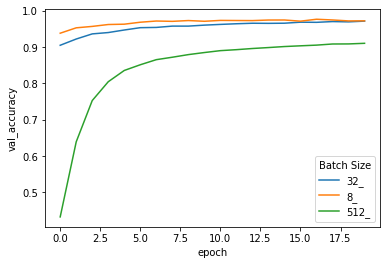

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

## Challenge

You will be expected to experiment with batch size on today's assignment.

# Learning Rate (Learn)

Lecture with Bruno Janota ~ 1:29:00

## Overview

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* Too high of a learning rate causes unstable results
* Too Low of a learning rate the model will underfit
* Goldy Locks parameters - it needs be "just right"
* Scale of 0-1

## Follow Along

Same experiment with Batch but different learning rates:
* High Learning = .75
* Default Learning = .01
* Low Learning Rate = .0001

### Default Learning Rate

In [ ]:
model = create_model(learning_rate=0.01)
lr_default = model.fit(X_train, y_train,
                       epochs=20,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2087 - accuracy: 0.6539 - val_loss: 0.3402 - val_accuracy: 0.9048
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3320 - accuracy: 0.9067 - val_loss: 0.2707 - val_accuracy: 0.9258
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9240 - val_loss: 0.2364 - val_accuracy: 0.9334
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2327 - accuracy: 0.9345 - val_loss: 0.2069 - val_accuracy: 0.9416
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2001 - accuracy: 0.9417 - val_loss: 0.1842 - val_accuracy: 0.9477
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1804 - accuracy: 0.9483 - val_loss: 0.1661 - val_accuracy: 0.9522
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1646 - accuracy: 0.9529 - val_loss: 0.1552 - val_accuracy:

### High Learning Rate

In [ ]:
model = create_model(learning_rate=0.75)
lr_high = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3614 - accuracy: 0.5118 - val_loss: 0.5632 - val_accuracy: 0.8041
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5454 - accuracy: 0.8475 - val_loss: 0.3943 - val_accuracy: 0.9055
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4450 - accuracy: 0.8844 - val_loss: 0.5605 - val_accuracy: 0.8429
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4644 - accuracy: 0.8843 - val_loss: 0.5595 - val_accuracy: 0.8154
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5446 - accuracy: 0.8359 - val_loss: 0.3938 - val_accuracy: 0.9089
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4120 - accuracy: 0.9067 - val_loss: 0.4043 - val_accuracy: 0.8949
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3588 - accuracy: 0.9144 - val_loss: 0.3867 - val_accuracy:

### Low Learning Rate

In [ ]:
model = create_model(learning_rate=0.0001)
lr_low = model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=32,
                   validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3108 - accuracy: 0.1391 - val_loss: 2.2439 - val_accuracy: 0.1799
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2300 - accuracy: 0.2077 - val_loss: 2.1720 - val_accuracy: 0.2757
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1592 - accuracy: 0.2996 - val_loss: 2.0963 - val_accuracy: 0.3653
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0833 - accuracy: 0.3796 - val_loss: 2.0133 - val_accuracy: 0.4348
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9976 - accuracy: 0.4380 - val_loss: 1.9229 - val_accuracy: 0.4844
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9087 - accuracy: 0.4897 - val_loss: 1.8276 - val_accuracy: 0.5271
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8167 - accuracy: 0.5278 - val_loss: 1.7302 - val_accuracy:

### Visualization of Results

In [ ]:
learning_rates = []
for exp, result in zip([lr_default, lr_low, lr_high], ["0.01_", "0.0001_", "0.75_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    learning_rates.append(df)
df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.731934,0.800067,0.340164,0.9048,0,0.01_
1,0.312616,0.911683,0.270717,0.9258,1,0.01_
2,0.258135,0.926117,0.236438,0.9334,2,0.01_
3,0.223782,0.936300,0.206911,0.9416,3,0.01_
4,0.197882,0.942933,0.184213,0.9477,4,0.01_


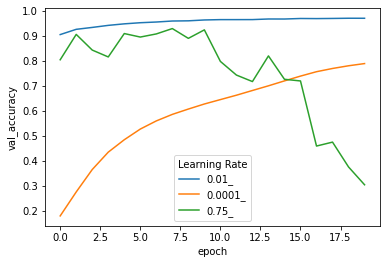

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

## Challenge

You will be expected to experiment with different learning rates today.

---